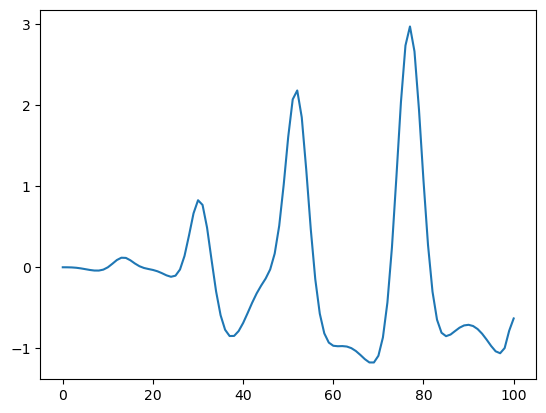

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x5 = np.load('slope5.npy')
x3 = np.load('slope3.npy')
plt.plot(x5 - x3)

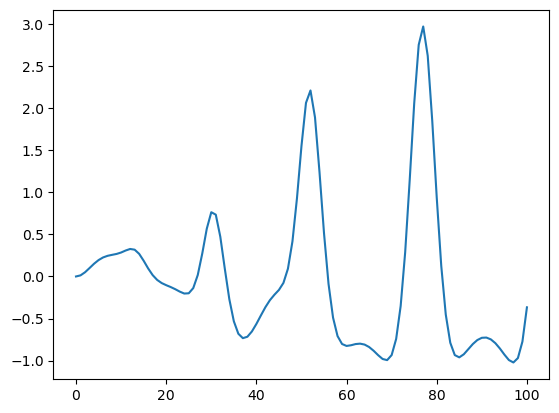

In [51]:
y5 = np.load('computed_slope5.npy')
y3 = np.load('computed_slope3.npy')
plt.plot(y5 - y3)

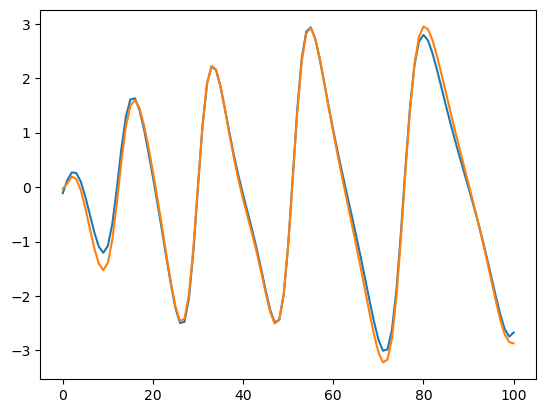

In [53]:
plt.plot(y5)
plt.plot(x5)

In [5]:
import S4
import ff
import numpy as np

L=1
n=5
depth = 0.473
wls = np.linspace(.35, 3, 2651)
i_wl = 502
p = 0
wl = wls[i_wl]
i=.7

for j in range(1,4):
    S = S4.New(Lattice=L, NumBasis=n)
    S.SetMaterial(Name='W',   Epsilon=(ff.w_n[i_wl+p+130]**2-1)+1)
    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl+p+130]**2-1)*i+1)


    S.AddLayer(Name='VacuumAbove', Thickness=0.5, Material='Vac')
    S.AddLayer(Name='Grating',      Thickness=depth, Material='Vac')
    S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/4, L/2), Angle = 0)
    S.AddLayer(Name='VacuumBelow', Thickness=1, Material='W')
    # S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    if j == 1 or j == 3:
        excitations.append((1, b'y', 1))
    if j > 1:
        excitations.append((2, b'y', 1))

    # excitations.append((4, b'y', 1))
    S.SetExcitationExterior(tuple(excitations))
    (_, back) = S.GetPowerFlux('VacuumAbove', zOffset=0)
    # z_space = np.linspace(0, 0.5 + depth + 1, 100)
    # x_space = np.linspace(0, 1, 50)
    # e = np.zeros((z_space.size, x_space.size), complex)
    # for zi, z in enumerate(z_space):
    #     for xi, x in enumerate(x_space):
    #         e[zi, xi] = S.GetFields(x, 0, z)[0][1]
    # im = plt.imshow(np.abs(e), extent=(x_space.min(), x_space.max(), z_space.max(), z_space.min()), aspect='auto', cmap='viridis')
    # plt.colorbar(im, label = '|e| mag')
    # plt.show()
    print(j)
    print(back)
    (forw_amp, back_amp) = S.GetAmplitudes('VacuumAbove', zOffset=0)
    print(back_amp)
    if j == 1:
        e1 = np.array(back_amp)
    elif j == 2:
        e2 = np.array(back_amp)
    elif j == 3:
        es = np.array(back_amp)
# def compute_ab_complex_lstsq(e1: np.ndarray, e2: np.ndarray, es: np.ndarray) -> tuple[complex, complex]:
#     # Build (M × 2) design matrix with complex entries
#     A = np.vstack([e1, e2]).T            # shape (M, 2), dtype=complex
#     # lstsq handles complex types correctly
#     (a, b), *_ = np.linalg.lstsq(A, es, rcond=None)  # :contentReference[oaicite:1]{index=1}
#     return a, b
# compute_ab(e1, e2, es)
# print(np.sum(np.abs(e1+e2-es)))

1
(-0.5191457312502916-5.551115123125783e-17j)
((-0.1760967155347666-0.6945319617990929j), (-0.016080735418346915-0.03534799078752405j), (-0.01608073541834699-0.035347990787524174j), (-0.00029584183533183764-0.00017190071157613732j), (-0.0002958418353318374-0.0001719007115761369j), 0j, 0j, 0j, 0j, 0j)
2
(-0.8653916034833129+2.7755575615628914e-17j)
((-0.030715285575820768-0.0675170384515831j), (0.4284858174297715+0.1737487537578293j), (0.09264967290720455+0.4773001793289035j), (0.0008561943677683322+0.0026533735167078736j), (-0.0012857658936512284-0.0011241802499754436j), 0j, 0j, 0j, 0j, 0j)
3
(-1.3692130963711697-2.7755575615628914e-17j)
((-0.20681200111058737-0.762049000250676j), (0.41240508201142456+0.13840076297030526j), (0.07656893748885757+0.44195218854137935j), (0.0005603525324364946+0.0024814728051317366j), (-0.0015816077289830658-0.0012960809615515806j), 0j, 0j, 0j, 0j, 0j)


In [44]:
import S4
import numpy as np
import ff

ang_pol = 90
N = 9
vac_depth = 0
depth = 0.473
L=1
i_wl = 0
wl = np.linspace(.35, 3, 2651)[i_wl]

S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

S.SetMaterial(Name='Vac', Epsilon=1)
S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/16, L/2), Angle = 0)

S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
S.SetFrequency(1.0 / wl)
S.SetExcitationPlanewave((0, 0), sAmplitude=np.cos(ang_pol * np.pi/180)*1/np.sqrt(2), pAmplitude=np.sin(ang_pol * np.pi/180)*1/np.sqrt(2), Order = 0)
forw, back = S.GetPowerFlux('VacuumAbove', zOffset=0)
print(f'Correct back: {back}')
(forw_amp, back_amp) = S.GetAmplitudes('VacuumAbove', zOffset=0)
# print('Back amplitudes:')
# for i in back_amp:
#     print(i)
basis = S.GetBasisSet()
print("Basis")
print(basis)

for i in range(0, 20):
    # basis_i = basis[i-1]
    S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
    S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

    S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
    S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
    S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/16, L/2), Angle = 0)

    S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    pc = 1 / np.sqrt(2)
    excitations.append((i, b'y', pc))
    excitations.append((i, b'x', pc))
    S.SetExcitationExterior(tuple(excitations))

    forw, back = S.GetPowerFlux('VacuumAbove', zOffset=0)
    print(i, back)

Correct back: (-0.2267752391179481+0j)
Basis
((0, 0), (0, -1), (-1, 0), (1, 0), (0, 1), (1, 1), (-1, 1), (-1, -1), (1, -1))
0 0j
1 (-0.4563898817778905+0j)
2 (-0.4882714931161418+0j)
3 (-0.4673119251385611+0j)
4 (-0.46731192513866193+0j)
5 (-0.4882714931161972+0j)
6 (-0.39861381465975904+0j)
7 (-0.5757648897883084+3.469446951953614e-18j)
8 (-0.3986138146603037+0j)
9 (-0.575764889788287+0j)
10 (-0.2267752391179481+0j)
11 (-0.26940808303365216+0j)
12 (-0.21799662677172338+1.3877787807814457e-17j)
13 (-0.21799662677182408-1.3877787807814457e-17j)
14 (-0.2694080830339193-4.336808689942018e-19j)
15 (-0.2511627903542092+0j)
16 (-0.25116279035420974-3.469446951953614e-18j)
17 (-0.25116279035468886-3.469446951953614e-18j)
18 (-0.2511627903541554-3.469446951953614e-18j)
19 (-1.7156277983888108e-43+0j)


In [151]:
import S4
import numpy as np
import ff

ang_pol = 45
N = 9
vac_depth = 0
depth = 0.473
L=1
i_wl = 0
wl = np.linspace(.35, 3, 2651)[i_wl]

for i in range(0, 20):
    # basis_i = basis[i-1]
    S = S4.New(Lattice=((L,0), (0,L)), NumBasis=N)
    S.SetMaterial(Name='W',   Epsilon=ff.w_n[i_wl + 130]**2)

    S.SetMaterial(Name='Vac', Epsilon=1)
    S.SetMaterial(Name='AlN', Epsilon=(ff.aln_n[i_wl + 130]**2))

    S.AddLayer(Name='VacuumAbove', Thickness=vac_depth, Material='Vac')
    S.AddLayer(Name='Grating', Thickness=depth, Material='Vac')
    # S.SetRegionRectangle(Layer = 'Grating', Material = 'AlN', Center = (L/2, L/2), Halfwidths = (L/2, L/4), Angle = 0)

    # S.AddLayer(Name='Ab', Thickness=1.0, Material='W')
    S.SetFrequency(1.0 / wl)

    excitations = []
    pc = 1 / np.sqrt(2)
    # excitations.append((i, b'y', 1))
    excitations.append((i, b'x', 1))
    S.SetExcitationExterior(tuple(excitations))
    # S.SetExcitationPlanewave((0, 0), sAmplitude=np.cos(ang_pol * np.pi/180), pAmplitude=np.sin(ang_pol * np.pi/180), Order = 6)


    forw, back = S.GetPowerFlux('Grating', zOffset=0)
    print(i, forw)

0 0j
1 (1+0j)
2 (1.0675210253672476+0j)
3 (0.9367496997597596+0j)
4 (0.9367496997597596+0j)
5 (1.0675210253672476+0j)
6 (1.009889017573005+0j)
7 (1.009889017573005+0j)
8 (1.009889017573005+0j)
9 (1.009889017573005+0j)
10 0j
11 0j
12 0j
13 0j
14 0j
15 (6.476707133772738e-33-1.5140731815630385e-33j)
16 (6.476707133772738e-33-1.5140731815630385e-33j)
17 (6.476707133772738e-33-1.5140731815630385e-33j)
18 (6.476707133772738e-33-1.5140731815630385e-33j)
19 0j


In [142]:
1.0675210253672476+0.9367496997597596

2.0042707251270073